In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
dataset=pd.read_csv(r"C:\Users\ggomare\Downloads\HR_comma_sep.csv")

In [3]:
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
Counter(dataset["Department"])

Counter({'sales': 4140,
         'accounting': 767,
         'hr': 739,
         'technical': 2720,
         'support': 2229,
         'management': 630,
         'IT': 1227,
         'product_mng': 902,
         'marketing': 858,
         'RandD': 787})

In [6]:
x=dataset.drop(columns=["salary"])
y=dataset["salary"]
y

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [8]:
lb=LabelEncoder()

In [9]:
x["Department"]=lb.fit_transform(x["Department"])

In [10]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
0,0.38,0.53,2,157,3,0,1,0,7
1,0.80,0.86,5,262,6,0,1,0,7
2,0.11,0.88,7,272,4,0,1,0,7
3,0.72,0.87,5,223,5,0,1,0,7
4,0.37,0.52,2,159,3,0,1,0,7
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8
14995,0.37,0.48,2,160,3,0,1,0,8
14996,0.37,0.53,2,143,3,0,1,0,8
14997,0.11,0.96,6,280,4,0,1,0,8


In [11]:
y=lb.fit_transform(y)

In [12]:
Counter(y)

Counter({1: 7316, 2: 6446, 0: 1237})

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [15]:
Model1=LogisticRegression()

In [16]:
Model1.fit(xtrain,ytrain)

C:\Users\ggomare\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
Model1.score(xtest,ytest)

0.49946666666666667

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
lb=OneHotEncoder()

In [20]:
x_se=dataset.drop(columns=["salary"])
y_se=dataset["salary"]

In [21]:
x_se=lb.fit_transform(x_se)


In [22]:
x1train,x1test,y1train,y1test=train_test_split(x_se,y_se,test_size=0.20)

In [23]:
Model1.fit(x1train,y1train)

C:\Users\ggomare\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
Model1.score(x1test,y1test)

0.515

In [25]:
Model1.predict(x1test)

array(['low', 'low', 'low', ..., 'medium', 'low', 'low'], dtype=object)

<AxesSubplot:xlabel='Department'>

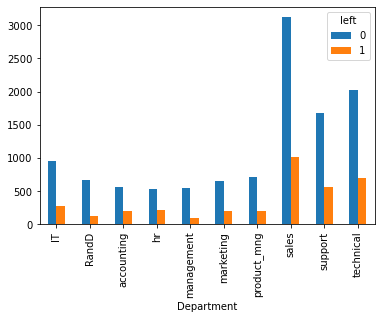

In [26]:
pd.crosstab(dataset.Department,dataset.left).plot(kind='bar')

<AxesSubplot:xlabel='salary'>

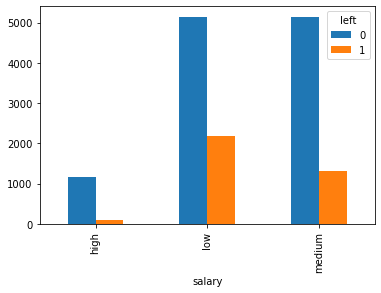

In [27]:
pd.crosstab(dataset.salary,dataset.left).plot(kind='bar')

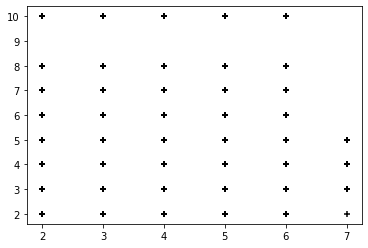

In [32]:
plt.scatter(x["number_project"],x["time_spend_company"],marker="+",color="black")